In [2]:
import torch
import numpy
import re
import pandas as pd

from matplotlib import colors as mcolors
from pylab import *
# plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
# helper function because HC sparsities are messy
def get_avg_sparsity(row):
    sparsity_list = list(map(float, row.model_sparsity.replace('[', '').replace(']', '').split(',')))
    return 1.0*sum(sparsity_list)/len(sparsity_list)

In [4]:
# load all the datafiles you want to plot here

df_weight_train = pd.read_csv("results/results_acc_mnist_training.csv")
df_ep = pd.read_csv("results/results_acc_mnist_ep.csv")
df_hc = pd.read_csv("results/HC_results_mnist.csv")
df_hc['model_sparsity'] = df_hc.apply(lambda row: get_avg_sparsity(row), axis=1)
df_greedy = pd.read_csv("results/plot_data_mnist_greedy.csv")
# rename columns
df_greedy.columns = ['train_acc', 'test_acc', 'epoch', 'model_sparsity']
# df_greedy['sparsity'] = -1
df_pt_hacky = pd.read_csv("results/results_acc_mnist_pt_hacky_adam.csv")
df_pt_noreg = pd.read_csv("results/results_acc_mnist_pt_noreg_adam.csv")
df_pt_reg = pd.read_csv("results/results_acc_mnist_pt_reg_adam.csv")



df_list = [df_weight_train, df_ep, df_hc, df_greedy, df_pt_hacky, df_pt_noreg, df_pt_reg]

df_ep.head() # just to make sure it looks fine

FileNotFoundError: [Errno 2] No such file or directory: 'results/results_acc_mnist_training.csv'

In [ ]:
# increasing this makes the curve smoother but less informative
SMOOTHING_WINDOW=10

for df in df_list:
    df['test_acc_smooth'] = df.test_acc
#     df['test_acc_smooth'] = df.test_acc.rolling(window=10, min_periods=1).mean()

In [ ]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# test acc
df_weight_train[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
                              label=r"Weight Training")

df_ep[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5")

df_greedy[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
                              label=r"Greedy Algo")

df_hc[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
                              label=r"HC Algo")

df_pt_hacky[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
                              label=r"PT Hacky")

df_pt_noreg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C5", markersize=20, markevery=1,
                              label=r"PT No regularization")

df_pt_reg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C6", markersize=20, markevery=1,
                              label=r"PT with regularization")



plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_acc_comparison_mnist.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

In [ ]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# test acc
df_weight_train[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
                              label=r"Weight Training")

df_ep[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5")


df_hc[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
                              label=r"HC Algo")

df_pt_hacky[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
                              label=r"PT Hacky")



plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_top_acc_comparison_mnist.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

In [ ]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# sparsity

df_ep[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5")

df_greedy[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
                              label=r"Greedy Algo")

# bug in the code
# df_hc[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
#                               label=r"HC Algo")

df_pt_hacky[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
                              label=r"PT Hacky")

df_pt_noreg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C5", markersize=20, markevery=1,
                              label=r"PT No regularization")

df_pt_reg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C6", markersize=20, markevery=1,
                              label=r"PT with regularization")



plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Sparsity (% of non-zero weights)",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_sparsity_comparison_mnist.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

## CIFAR10 Experiments

In [ ]:
# load all the datafiles you want to plot here

df_weight_train = pd.read_csv("results/results_acc_weight_training_CIFAR10_training.csv")
df_weight_train.columns = ["epoch", "test_acc", "sparsity"]
df_ep = pd.read_csv("results/results_acc_pruning_CIFAR10_ep_sgd.csv")
df_ep2 = pd.read_csv("results/results_acc_pruning_CIFAR10_ep_sgd_105.csv")

df_list = [df_weight_train, df_ep, df_ep2]

df_ep.head() # just to make sure it looks fine


In [ ]:
# increasing this makes the curve smoother but less informative
SMOOTHING_WINDOW=10

for df in df_list:
    df['test_acc_smooth'] = df.test_acc#.rolling(window=10, min_periods=1).mean()

In [ ]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# test acc
df_weight_train[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
                              label=r"Weight Training")

df_ep[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5")

df_ep2[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5 (lr=0.105)")



plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_acc_comparison_cifar10.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

## Sharpness  (2D)

In [5]:
num_epoch=30

In [6]:
size = np.load('results/CIFAR10_HC_{}epoch/results_2D_visualize_sharpness_sparsity_0.2_d_10_v_10_pruning_CIFAR10_hc_0.npy'.format(num_epoch)).shape

sparsity_hc_2D = np.zeros(size)
for idx in range(10):
    curr = np.load('results/CIFAR10_HC_{}epoch/results_2D_visualize_sharpness_sparsity_0.2_d_10_v_10_pruning_CIFAR10_hc_{}.npy'.format(num_epoch, idx))
    sparsity_hc_2D += curr
    #break
sparsity_hc_2D /= 10


In [7]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

Text(0, 0.5, 'hamming distance (along d2)')

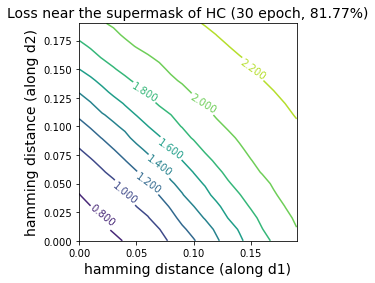

In [8]:
delta = 0.01
x = np.arange(0.0, 0.2, delta)
y = np.arange(0.0, 0.2, delta)
X, Y = np.meshgrid(x, y)
Z = sparsity_hc_2D

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
plt.axis('square')
if num_epoch == 30:
    ax.set_title('Loss near the supermask of HC (30 epoch, 81.77%)', fontsize=14)
elif num_epoch == 150:
    ax.set_title('Loss near the supermask of HC (150 epoch, 85.35%)', fontsize=14)

plt.xlabel('hamming distance (along d1)', fontsize=14)
plt.ylabel('hamming distance (along d2)', fontsize=14)

Text(0.5, 1.0, 'Simplest default with labels')

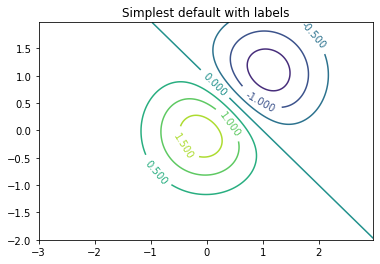

In [9]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')

## Sharpness (1D), Hypercube

In [15]:
#df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch/results_visualize_sharpness_pruning_CIFAR10_hc.csv")
#df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch/results_visualize_sharpness_sparsity1_0.2_d1_100_v_10_pruning_CIFAR10_hc.csv")
#df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch_connectivity/results_visualize_connectivity_d_1_v_1_pruning_CIFAR10_hc.csv")
df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch_connectivity/results_visualize_connectivity_d_1_v_5_pruning_CIFAR10_hc.csv")
#df_sparsity_hc = pd.read_csv("results/CIFAR10_WeightTraining_100epoch_connectivity/results_visualize_connectivity_d_1_v_5_weight_training_CIFAR10_training.csv")
df_sparsity_hc


,dist,train_loss_mean,train_loss_std,test_acc_mean,test_acc_std
0,0.0000,0.305134,0.000000,83.950,0.000000
1,0.0047,0.313752,0.009352,83.740,0.273130
2,0.0095,0.327273,0.016278,83.490,0.352704
3,0.0142,0.326808,0.017394,83.538,0.124161
4,0.0190,0.337321,0.011636,82.976,0.266428
...,...,...,...,...,...
96,0.4556,0.356973,0.015978,83.976,0.625575
97,0.4604,0.347104,0.019376,84.464,0.289386
98,0.4651,0.332175,0.007433,84.422,0.266938
99,0.4699,0.336371,0.010525,84.788,0.125603


<Figure size 1440x1872 with 0 Axes>

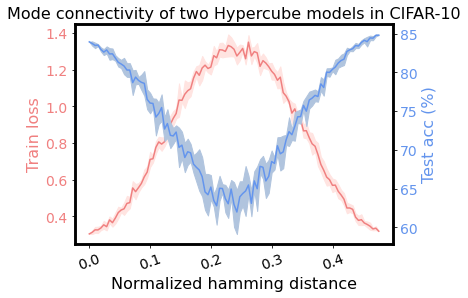

In [17]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

t = df_sparsity_hc['dist'] 
loss_mean, loss_std = df_sparsity_hc['train_loss_mean'], df_sparsity_hc['train_loss_std']
acc_mean, acc_std = df_sparsity_hc['test_acc_mean'], df_sparsity_hc['test_acc_std']

fig, ax1 = plt.subplots()
plt.xticks(size=14, rotation=20)
color = 'lightcoral'#'tab:red'
ax1.set_xlabel('Normalized hamming distance', fontsize = 16)
ax1.set_ylabel('Train loss', color=color, fontsize = 16)
ax1.plot(t, loss_mean, color=color)
plt.fill_between(t, loss_mean-loss_std, loss_mean+loss_std, color='mistyrose')
ax1.tick_params(axis='y', labelcolor=color, labelsize = 14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'cornflowerblue' #'tab:blue'
ax2.set_ylabel('Test acc (%)', color=color, fontsize = 16)  # we already handled the x-label with ax1
ax2.plot(t, acc_mean, color=color)
plt.fill_between(t, acc_mean-acc_std, acc_mean+acc_std, color='lightsteelblue') #plt.title('MNIST, LeNet-5, Random weight switching', fontsize=fontsize) #plt.errorbar(dist_list*100, err_stat[:,0], err_stat[:,1])
ax2.tick_params(axis='y', labelcolor=color, labelsize = 14)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Mode connectivity of two Hypercube models in CIFAR-10', fontsize=16)
#plt.title('Mode connectivity of two Weight-trained models in CIFAR-10', fontsize=16)
plt.savefig("1D_visualizing_mode_connectivity_cifar_hc.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

## Sharpness (1D), Weight Training & HyperCube (HC)

In [48]:
df_sparsity_wt = pd.read_csv("results/CIFAR10_WeightTraining_100epoch_connectivity/results_visualize_connectivity_d_1_v_5_weight_training_CIFAR10_training_prob.csv")
df_sparsity_wt_lin = pd.read_csv("results/CIFAR10_WeightTraining_100epoch_connectivity/results_visualize_connectivity_d_1_v_1_weight_training_CIFAR10_training_linear.csv")
df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch_connectivity/results_visualize_connectivity_d_1_v_5_pruning_CIFAR10_hc_prob.csv")

In [63]:
df_sparsity_wt_lin

,dist,train_loss_mean,train_loss_std,train_acc_mean,train_acc_std,test_acc_mean,test_acc_std
0,0.00,0.177296,0.0,93.298,0.0,87.04,0.0
1,0.01,0.182888,0.0,93.246,0.0,87.05,0.0
2,0.02,0.191039,0.0,93.158,0.0,86.92,0.0
3,0.03,0.201016,0.0,93.140,0.0,86.80,0.0
4,0.04,0.213018,0.0,93.194,0.0,86.68,0.0
...,...,...,...,...,...,...,...
96,0.96,0.193357,0.0,92.250,0.0,86.34,0.0
97,0.97,0.183759,0.0,92.336,0.0,86.51,0.0
98,0.98,0.175670,0.0,92.386,0.0,86.65,0.0
99,0.99,0.169467,0.0,92.578,0.0,86.81,0.0


<Figure size 1440x1872 with 0 Axes>

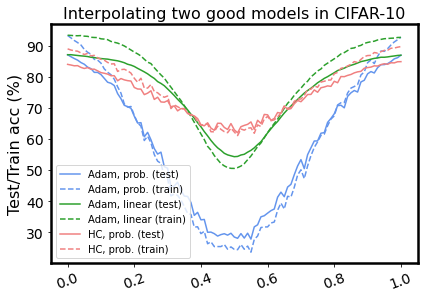

In [64]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

t = df_sparsity_wt['dist'] 
#loss_mean_wt, loss_std_wt = df_sparsity_wt['train_loss_mean'], df_sparsity_wt['train_loss_std']
acc_mean_wt, acc_std_wt = df_sparsity_wt['test_acc_mean'], df_sparsity_wt['test_acc_std']
acc_mean_wt_lin, acc_std_wt_lin = df_sparsity_wt_lin['test_acc_mean'], df_sparsity_wt_lin['test_acc_std']
acc_mean_hc, acc_std_hc = df_sparsity_hc['test_acc_mean'], df_sparsity_hc['test_acc_std']

train_acc_mean_wt, train_acc_std_wt = df_sparsity_wt['train_acc_mean'], df_sparsity_wt['train_acc_std']
train_acc_mean_wt_lin, train_acc_std_wt_lin = df_sparsity_wt_lin['train_acc_mean'], df_sparsity_wt_lin['train_acc_std']
train_acc_mean_hc, train_acc_std_hc = df_sparsity_hc['train_acc_mean'], df_sparsity_hc['train_acc_std']



#fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
plt.xticks(size=14, rotation=20)
'''
color = 'lightcoral'#'tab:red'
ax1.set_xlabel('Normalized hamming distance', fontsize = 16)
ax1.set_ylabel('Train loss', color=color, fontsize = 16)
ax1.plot(t, loss_mean, color=color)
plt.fill_between(t, loss_mean-loss_std, loss_mean+loss_std, color='mistyrose')
ax1.tick_params(axis='y', labelcolor=color, labelsize = 14)
'''
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Test/Train acc (%)', fontsize = 16)  # we already handled the x-label with ax1

color = 'cornflowerblue' #'tab:blue'
ax2.plot(t, acc_mean_wt, color=color)
#plt.fill_between(t, acc_mean_wt-acc_std_wt, acc_mean_wt+acc_std_wt, color='lightsteelblue') #plt.title('MNIST, LeNet-5, Random weight switching', fontsize=fontsize) #plt.errorbar(dist_list*100, err_stat[:,0], err_stat[:,1])

ax2.plot(t, train_acc_mean_wt, '--', color=color)

color = 'tab:green'
ax2.plot(t, acc_mean_wt_lin, color=color)
#plt.fill_between(t, acc_mean_wt_lin-acc_std_wt_lin, acc_mean_wt_lin+acc_std_wt_lin, color='tab:green') #plt.title('MNIST, LeNet-5, Random weight switching', fontsize=fontsize) #plt.errorbar(dist_list*100, err_stat[:,0], err_stat[:,1])

ax2.plot(t, train_acc_mean_wt_lin, '--', color=color)


color = 'lightcoral' #'tab:blue'
ax2.plot(t, acc_mean_hc, color=color)
#plt.fill_between(t, acc_mean_hc-acc_std_hc, acc_mean_hc+acc_std_hc, color='mistyrose') #plt.title('MNIST, LeNet-5, Random weight switching', fontsize=fontsize) #plt.errorbar(dist_list*100, err_stat[:,0], err_stat[:,1])

ax2.plot(t, train_acc_mean_hc, '--', color=color)


ax2.tick_params(axis='y', labelsize = 14)
ax2.legend(['Adam, prob. (test)', 'Adam, prob. (train)', 'Adam, linear (test)', 'Adam, linear (train)', 'HC, prob. (test)', 'HC, prob. (train)'])




fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Interpolating two good models in CIFAR-10', fontsize=16)
plt.savefig("1D_visualizing_mode_connectivity_cifar_adam_hc.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

## Sharpness (1D), HyperCube (HC) -- old


<Figure size 1440x1872 with 0 Axes>

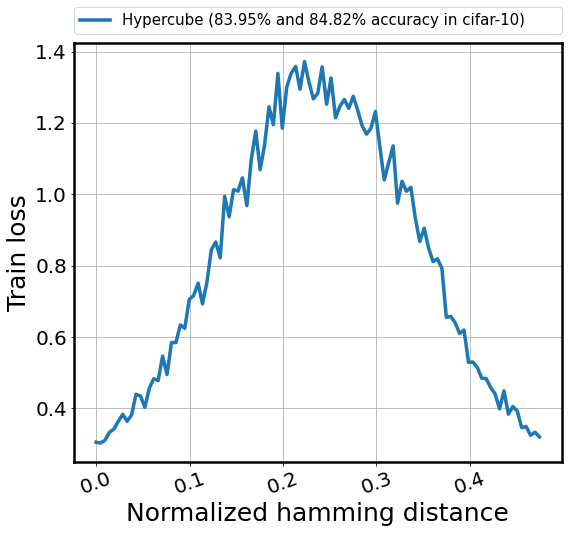

In [44]:
#df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch/results_visualize_sharpness_pruning_CIFAR10_hc.csv")
#df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch/results_visualize_sharpness_sparsity1_0.2_d1_100_v_10_pruning_CIFAR10_hc.csv")
df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch_connectivity/results_visualize_connectivity_d_1_v_1_pruning_CIFAR10_hc.csv")


#df_sparsity_hc['batch_train_loss_avg'] = df_sparsity_hc.iloc[:, 1:].mean(axis=1)


fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 1000

# test acc
df_sparsity_hc[:observation_window].plot(x='dist', y='batch_train_loss', linestyle='-',
                              ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
                              label=r"Hypercube (83.95% and 84.82% accuracy in cifar-10)")#, title='averaged (100 directions, 10 samples)')



plt.xlabel("Normalized hamming distance",fontsize=25)
plt.ylabel("Train loss",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("1D_visualizing_mode_connectivity_cifar_hc.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)